In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn .model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Data Prepare

In [2]:
# Prepare
df = pd.read_csv("../datas/Hitters.csv")
df = df.dropna()

# Dummie
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1)
X = pd.concat([X, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)

# Test Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Reduce
pca = PCA()

X_reduced_train = pca.fit_transform(scale(X_train))
print(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[:10])

X_reduced_test = pca.fit_transform(scale(X_test))
print(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[:10])

[38.18 59.88 70.88 78.88 84.18 88.45 92.05 94.86 96.34 97.28]
[39.74 62.29 71.86 80.34 86.24 90.47 93.78 95.85 97.04 97.8 ]


# Model

In [3]:
# Model
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)

# Predict
y_pred_train = pcr_model.predict(X_reduced_train)
y_pred_test = pcr_model.predict(X_reduced_test)

# Errors
print(f"Train Mse: {np.sqrt(mean_squared_error(y_train, y_pred_train))}\n"
      f"Test Mse: {np.sqrt(mean_squared_error(y_test, y_pred_test))}\n"
      f"Train R2: {r2_score(y_train, y_pred_train)}\n"
      f"Test R2: {r2_score(y_test, y_pred_test)}")

Train Mse: 289.3292825564976
Test Mse: 405.1575364149965
Train R2: 0.5770075250410179
Test R2: 0.24170463640313256


# Model Tuning

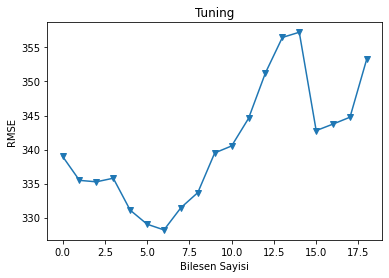

In [4]:
# Cross Valudation
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

# Loop for calculate errors
lm = LinearRegression()
RMSE = []
for i in range(1,X_reduced_train.shape[1]+1):
    score = np.sqrt(-1*model_selection.cross_val_score(lm,
                                                     X_reduced_train[:,:i],
                                                     y_train.ravel(),
                                                     cv=cv_10,
                                                     scoring='neg_mean_squared_error').mean())
    RMSE.append(score)


plt.plot(RMSE, '-v')
plt.xlabel('Bilesen Sayisi')
plt.ylabel('RMSE')
plt.title('Tuning');

6

# Final Model

In [5]:
# New Model
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)

# Predict
y_pred_train = pcr_model.predict(X_reduced_train[:,0:6])
y_pred_test = pcr_model.predict(X_reduced_test[:,0:6])

# Errors
print(f"Train R2 Error Mean: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
print(f"Test R2 Error Mean: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")

Train R2 Error Mean: 308.8265983094501
Test R2 Error Mean: 393.1198700096223
